 # MNIST
### Using Neural Networks to read hand written digits trained on MNIST database.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import *
import scipy.io
import scipy.optimize
from Algorithms import *     # Algorithms made for Cost Function and Gradient to run Neural Network
from DisplayData import *    # Displaying Data

> ### MNIST DATASET

We have 5000 training example of Handwritten digits. Each training example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is represented by a floating point number indicating the grayscale intensity at that location. The 20 by 20 grid of pixels is 'unrolled' into a 400-dimensional vector.

In [2]:
Data = scipy.io.loadmat('ex3data1.mat')

X_np = np.array(Data['X'])
y = np.array(Data['y'])
y = np.where(y == 10, 0, y)

> ### Visualizing the Data

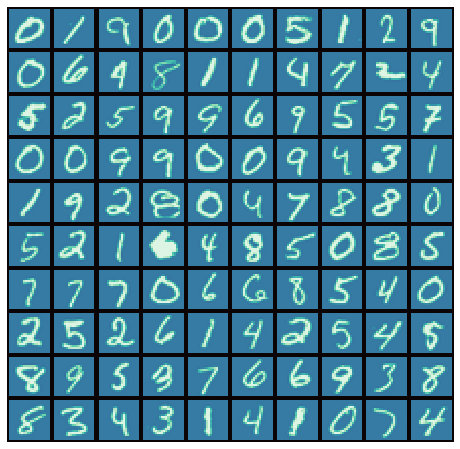

In [3]:
disp_X = DisplayData(X_np)
plt.figure(figsize=(8,8))
plt.axis('off')
ax = sns.heatmap(disp_X,cbar = False, cmap ="mako",vmin=-1, vmax=1)


Loading the preloaded network parameters already trained.

In [4]:
theta = scipy.io.loadmat('D:\study\Programming\ML\Coursera-ML\machine-learning-ex\ex4\ex4weights.mat')
Theta1 = theta['Theta1']
Theta2 = theta['Theta2']

In [5]:
nnParam = np.concatenate((Theta1.flatten(),Theta2.flatten()))
lambdaa = 0              # Regularization Parameter
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels  = 10         # 10 labels, from 1 to 10

#          Cost_Function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambdaa,key_change_Y, return_grad=False)
[J,grad] = Cost_Function(nnParam,input_layer_size,hidden_layer_size,num_labels,X_np,y,lambdaa,True,True)
print(f'With this arrangement and without Regularization the Cost Function = {J:0.06f}')

With this arrangement and without Regularization the Cost Function = 0.287629


In [6]:
lambdaa = 1         # Regularization Parameter set equal to 1

#          Cost_Function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lambdaa,key_change_Y, return_grad)
[J,grad] = Cost_Function(nnParam,input_layer_size,hidden_layer_size,num_labels,X_np,y,lambdaa,True,True)
print(f'With the same arrangement and with Regularization the Cost Function = {J:0.06f}')

With the same arrangement and with Regularization the Cost Function = 0.383770


> ### Training our own Neural Network Parameters from scratch using Back-Propagation.

We randomly initialize parameters for Neural Networks and Train it for regularization parameter = 0.3 for 500 iterations.

In [7]:
initial_theta1 = np.random.rand(25, 401)
initial_theta2 = np.random.rand(10, 26)

initial_nnParam = np.concatenate((initial_theta1.flatten(),initial_theta2.flatten()))
lambdaa = 0.3
nn_Param = scipy.optimize.fmin_cg(f=Cost_Function, x0=initial_nnParam, fprime=Theta_Grad, args=(input_layer_size,hidden_layer_size,num_labels,X_np,y,lambdaa,False,False),epsilon=1e-3, maxiter=300,full_output = True)

         Current function value: 0.191184
         Iterations: 300
         Function evaluations: 632
         Gradient evaluations: 631


Opening Trained Neural Network Parameters for further use.

In [8]:
Theta1 = np.reshape(nn_Param[0][:hidden_layer_size * (input_layer_size + 1)],(hidden_layer_size, input_layer_size + 1))
Theta2 = np.reshape(nn_Param[0][hidden_layer_size * (input_layer_size + 1):], (num_labels, hidden_layer_size + 1))

We use the trained parameters to predict the handwritten digits randomly. We output Real Value of the Handwritten Digits and Predicted Value of the Handwritten Digits along with it's image.

Real Value = 2
Predicted Value = 2


(0.0, 22.0, 22.0, 0.0)

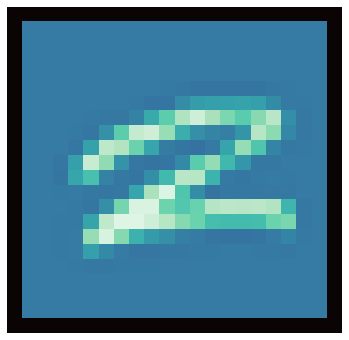

In [9]:
p = np.random.randint(0,X_np.shape[0])
print(f'Real Value = {y[p][0]}')
print(f'Predicted Value = {Predict(Theta1,Theta2,X_np[p])}')
plt.figure(figsize=(6,6))
ax = sns.heatmap(make_np_array(X_np[p]).T,cbar = False, cmap ="mako",vmin=-1, vmax=1)
plt.axis('off')

In [10]:
[Correct, Wrong] = Accuracy(X_np,Theta1,Theta2,y)
print(f'''Number of Samples   = {len(y)} 
Correctly Predicted = {Correct}
Wrongly Predicted   = {Wrong}
Accuracy            =  {100*Correct/(Correct+Wrong):0.2f}''')

Number of Samples   = 5000 
Correctly Predicted = 4991
Wrongly Predicted   = 9
Accuracy            =  99.82


Out of <code>5000</code> training samples <br> 
<code>4991</code> were predicted correctly whereas only <br>
<code>9</code> were predicted wrongly, <br>
This gives an Accuracy =  <code>99.82</code> <br>

> ### Visualizing the Neural Network Parameter of Hidden Layer.

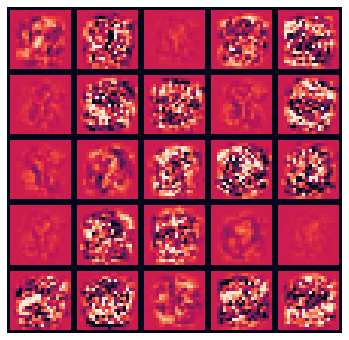

In [11]:
disp_Theta = Display_visualization(Theta1[:,1:])
plt.figure(figsize=(6,6))
#plt.imshow(disp_Theta, cmap = 'gray',vmin=-1, vmax=1)
plt.axis('off')
ax = sns.heatmap(disp_Theta,cbar = False, cmap ="rocket",vmin=-1, vmax=1)